In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import lightkurve as lk
import periodogram_properties as pprop
import autolcper 
import warnings
warnings.filterwarnings("ignore")
# %matplotlib auto

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

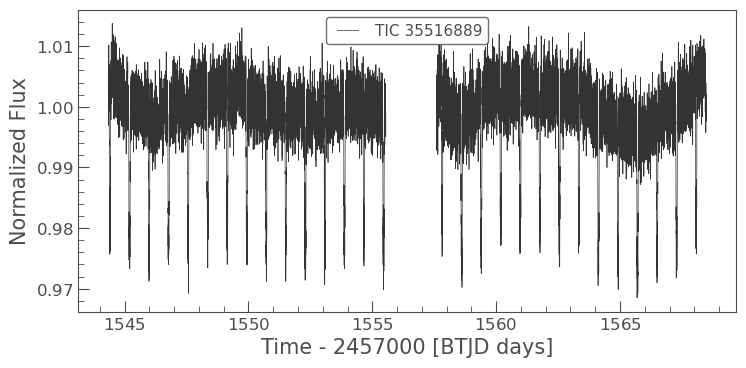

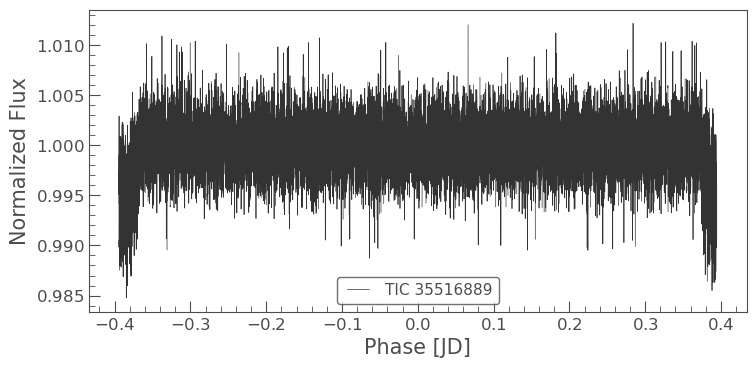

In [3]:
# Wasp 19
search_results = lk.search_lightcurve('TIC 35516889', radius=None, 
                                      exptime='short', cadence=None, 
                                      mission='TESS', author='SPOC', 
                                      quarter=None, month=None, 
                                      campaign=None, 
                                      sector=(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26), 
                                      limit=None)
search_results

# downloading
lc = search_results.download_all(quality_bitmask='default', download_dir=None, cutout_size=None)
lc = lc.stitch()

lc.plot()

lc.flatten(11).fold(period=0.78884).plot()

In [28]:
def automator(ticid: int,save=False,period=0.0,epoch_time=0.0):
    """automates the plotter

    Args:
        ticid (int): 16 digit TESS target id
    """       
    lc = pprop.searchNstitch(ticid=ticid)

    if (period != 0.0) & (epoch_time != 0.0):
        ls_period = period
        bls_period = period
        t0 = epoch_time
    
    else:
        ls,bls = pprop.genp(lc.flatten())

        ls_period,bls_period,t0,dur = pprop.getLSparams(ls,bls)
        print("LS Period : {}\nBLS Period : {}\nT0 : {}\nTransit duration : {}".format(ls_period,bls_period,t0,dur))

    fig3,ax = plt.subplots(1)
    lc.fold(period=bls_period,normalize_phase=True,t0=t0).plot(color='k')
    plt.tight_layout()
    if save:
        plt.savefig('TIC'+str(ticid)+'_fold_bls.eps')            


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


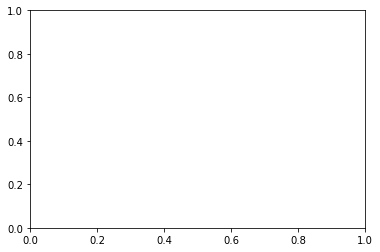

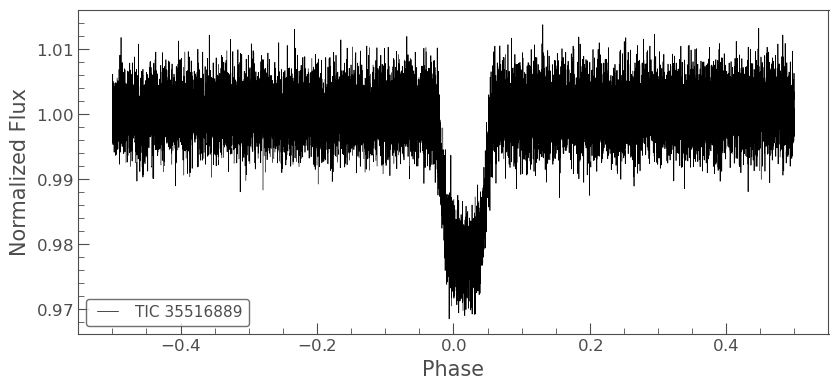

In [32]:
automator(35516889,period=0.78884,epoch_time=1544.398406060177,save=True)

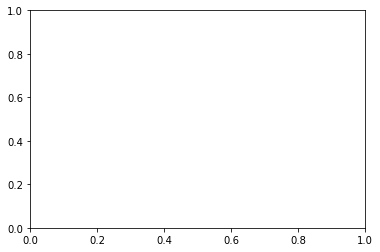

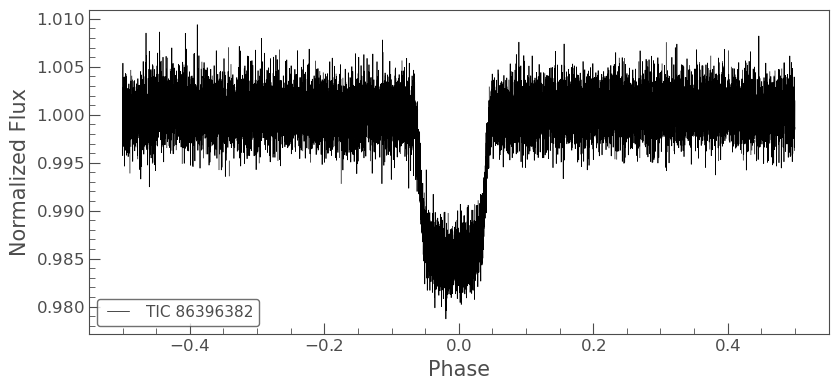

In [31]:
automator(86396382,period=1.09141937,epoch_time=1843.0145101849985)

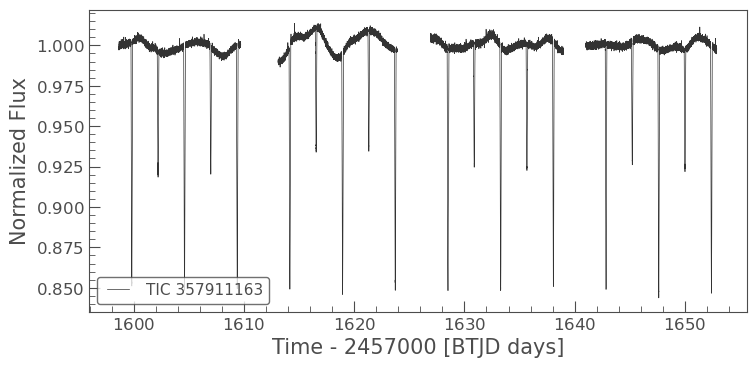

In [34]:
search_results = lk.search_lightcurve('TIC 357911163', radius=None, 
                                      exptime='short', cadence=None, 
                                      mission='TESS', author='SPOC', 
                                      quarter=None, month=None, 
                                      campaign=None, 
                                      sector=(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26), 
                                      limit=None)
search_results

# downloading
lc = search_results.download_all(quality_bitmask='default', download_dir=None, cutout_size=None)
lc = lc.stitch()

lc.plot()

flattened = lc.flatten(105)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


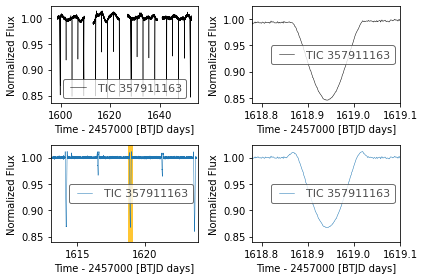

In [47]:
f, (a0, a1) = plt.subplots(2, 2, gridspec_kw={'height_ratios': [1, 1]})
clc = lc.flatten(105)
lc.plot(ax = a0[0],color='k')
lc.plot(ax = a0[1],color='k')

a0[1].set_ylim(0.84,1.024)
a0[1].set_xlim(1618.78,1619.1);

clc.plot(ax=a1[0])
a1[0].set_ylim(0.84,1.024)
a1[0].set_xlim(1613,1624)
a1[0].axvspan(1618.78,1619.1,color='#FFC633');

clc.plot(ax = a1[1])
a1[1].set_ylim(0.84,1.024)
a1[1].set_xlim(1618.78,1619.1);

f.tight_layout()
plt.savefig('flattening.eps',dpi=200)